In [33]:
import pandas as pd 

In [34]:
df_no = pd.read_csv('df_gender.csv')

In [35]:
df_no.dtypes #para ver de qué tipo es cada columna 

adult                   bool
backdrop_path         object
genre_ids             object
id                     int64
original_language     object
original_title        object
overview              object
popularity           float64
poster_path           object
release_date          object
title                 object
video                   bool
vote_average         float64
vote_count             int64
columna1              object
columna2              object
columna3              object
columna4              object
columna5              object
columna6              object
columna7              object
dtype: object

In [36]:
numero_filas = df_no.shape[0]

print("Número de filas en mi DataFrame:", numero_filas)


Número de filas en mi DataFrame: 50020


In [37]:
df_no.isnull().sum()

adult                   0
backdrop_path        8436
genre_ids               0
id                      0
original_language       0
original_title          0
overview             1513
popularity              0
poster_path           787
release_date            1
title                   0
video                   0
vote_average            0
vote_count              0
columna1                0
columna2                0
columna3                0
columna4                0
columna5                0
columna6                0
columna7                0
dtype: int64

In [38]:
#borro valores nulos 
df_no_sin_nulos = df_no.dropna()


In [39]:
df_no_sin_nulos.isnull().sum()

adult                0
backdrop_path        0
genre_ids            0
id                   0
original_language    0
original_title       0
overview             0
popularity           0
poster_path          0
release_date         0
title                0
video                0
vote_average         0
vote_count           0
columna1             0
columna2             0
columna3             0
columna4             0
columna5             0
columna6             0
columna7             0
dtype: int64

In [44]:
#cuántas veces aparece cada género 
columnas_generos = df_no[['columna1', 'columna2', 'columna3', 'columna4', 'columna5', 'columna6', 'columna7']]

conteo_por_genero = {}

#itero
for columna in columnas_generos.columns:
    conteo = columnas_generos[columna].value_counts()
    
    for genero, cantidad in conteo.items():
        conteo_por_genero[genero] = conteo_por_genero.get(genero, 0) + cantidad

#imprimo el conteo de cada género 
print("Conteo de cada género:")
for genero, cantidad in conteo_por_genero.items():
    print(f"{genero}: {cantidad}")


Conteo de cada género:
Drama: 22045
Comedy: 11729
Documentary: 5063
Horror: 6158
Action: 5300
Thriller: 8219
Romance: 6374
Animation: 3150
No_gender: 255088
Crime: 3872
Science Fiction: 3189
Family: 3189
Adventure: 3224
TV Movie: 3044
Fantasy: 2938
Music: 1578
Mystery: 2651
War: 1059
History: 1891
Western: 379


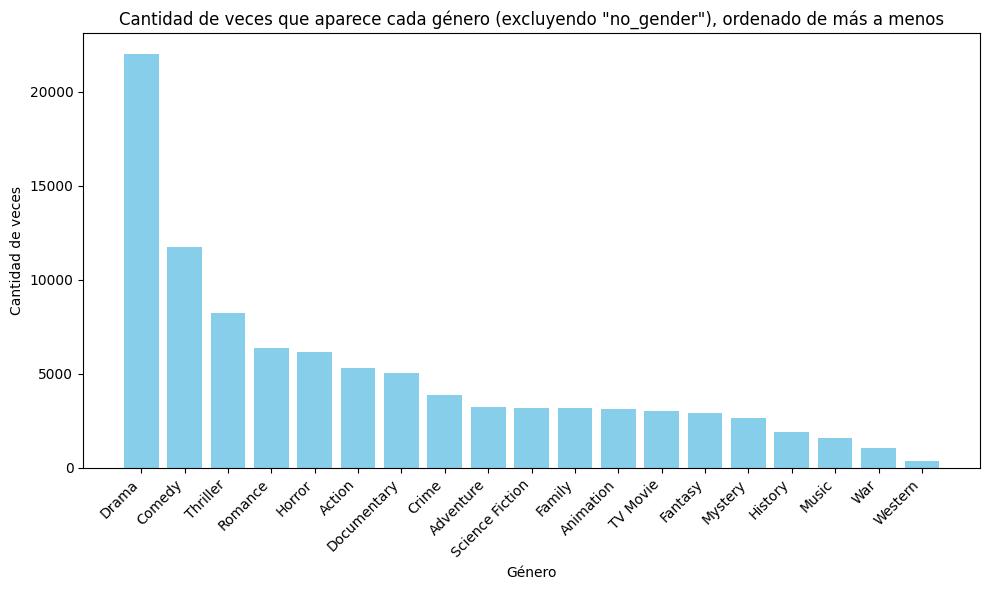

In [58]:
import matplotlib.pyplot as plt

# Filtrar los géneros excluyendo 'no_gender'
conteo_filtrado = {genero: cantidad for genero, cantidad in conteo_por_genero.items() if genero != 'No_gender'}

# Ordenar los géneros según la cantidad de veces que aparecen de más a menos
generos_ordenados = sorted(conteo_filtrado.keys(), key=lambda x: conteo_filtrado[x], reverse=True)
cantidades_ordenadas = [conteo_filtrado[genero] for genero in generos_ordenados]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(generos_ordenados, cantidades_ordenadas, color='skyblue')
plt.xlabel('Género')
plt.ylabel('Cantidad de veces')
plt.title('Cantidad de veces que aparece cada género (excluyendo "no_gender"), ordenado de más a menos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [ ]:
df_no.drop('column_name', axis=1, inplace=True)


In [ ]:
#generos que más se repiten 
columnas_generos = [f'columna{i}' for i in range(1, 8)]
generos = df_no[columnas_generos].stack()
conteo_generos = generos.value_counts()
top_3_generos = conteo_generos.head(3)

print("Los 3 géneros más comunes son:")
print(top_3_generos)


In [ ]:
duplicates = df_no['column_name'].duplicated()
duplicate_values = df_no[duplicates]

print("Duplicate values in the column:")
duplicate_values


In [ ]:
#outliers 

import numpy as np

z_scores = (df_no - df_no.mean()) / df_no.std()
threshold = 3
outliers = np.abs(z_scores) > threshold

print(df_no[outliers.any(axis=1)])
